# Résumé de quelques outils utiles en TP, partie 1 du cours.

In [1]:
# Chargement des bibliothèques
import numpy as np                # Pour faire du calcul scientifique
import matplotlib.pyplot as plt   # Pour illustrer les résultats à l’aide de graphiques

## Ordre de grandeur de l’erreur machine : $10^{-16}$.
C’est une erreur relative : $x$ et $x+10^{-16}·x$ sont en général codés par le même nombre en machine.

In [2]:
1-1e-16 ==1, 1-5e-17 == 1 , 1+1e-16 ==1, 200+200*1e-15 == 200

(False, True, True, False)

## Représenter une suite qui tend vers $0$. Échelle logarithmique ou pas des graphes.
On choisit les échelles de telle sorte d’observer quelque chose d’intéressant. 

* Fonctions de matplotlib utilisées : `plot`, `semilogy`, `loglog`, `grid`
* Fonctions de numpy utilisées : `arange`, `logspace`, `int_`

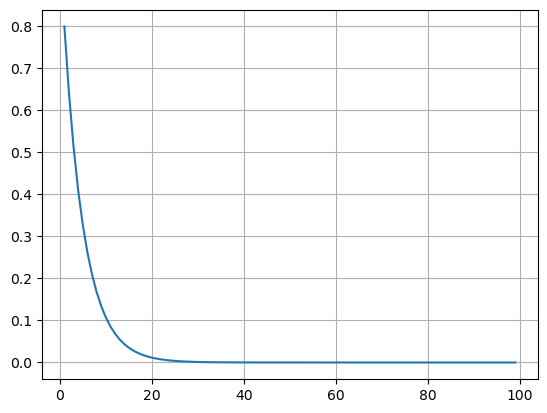

In [3]:
n=np.arange(1,100)
α=0.8
xn=α**n
plt.plot(n,xn)
plt.grid()

On voit que ça converge vite, mais pas grand-chose de plus. Est-ce linéaire, super-linéaire ?

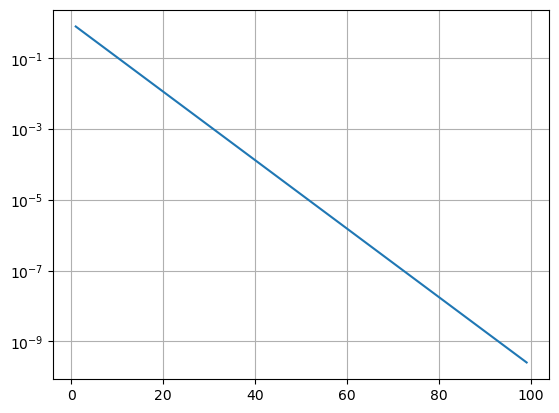

In [4]:
plt.semilogy(n,xn)
plt.grid()

Une droite en échelle semi-logarithmique indique la convergence linéaire. Si on veut estimer grossièrement le taux de convergence, on observe qu’en 20 itérations, on gagne environ un facteur 100. Donc on peut imaginer que $x_n$ est de l’ordre de grandeur de $Cα^n$ avec $α$ environ égal à $(\frac1{100})^{\frac1{20}}$ (puisque $α^20$ vaut environ $\frac1{100}$).

In [5]:
(1/100)**(1/20)

0.7943282347242815

Pas si éloigné de la vraie valeur !

On regarde maintenant une autre suite $(x_n)$.

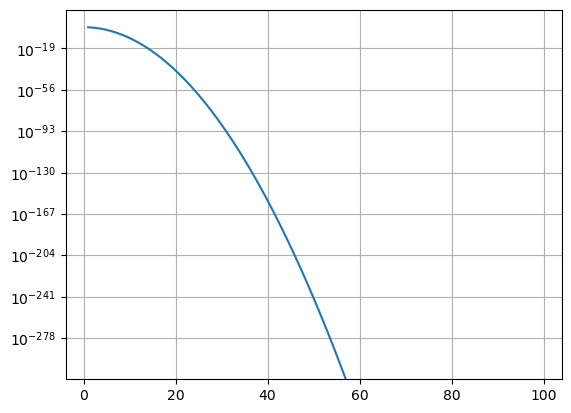

In [6]:
xn=α**(n**2)
plt.semilogy(n,xn)
plt.grid()

Décroissance super-linéaire (en échelle semi-logarithmique, décroissance plus rapide que n’importe quelle « droite »). Pourtant, la convergence n’est ici pas d’ordre $r$ pour aucun $r>1$ : on a bien $α^{n^2}=o(β^{r^n})$ pour tout $β<1$. 

Regardons enfin comment estimer la vitesse de convergence d’une suite à convergence lente.

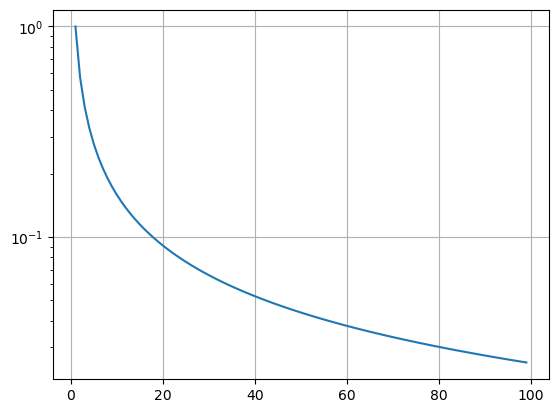

In [7]:
q=0.8
xn=1/n**q
plt.semilogy(n,xn)
plt.grid()

On voit que la convergence est sous-linéaire (plus « lente » que toute « droite » en échelle logarithmique). Pour pouvoir voir quelque chose de plus précis, on change aussi l’échelle des abscisses (au passage ici, on voit qu’il serait utile de prendre des $n$ plus grands, et logarithmiquement répartis pour observer quelque chose en échelle logarithmique au niveau des abscisses).

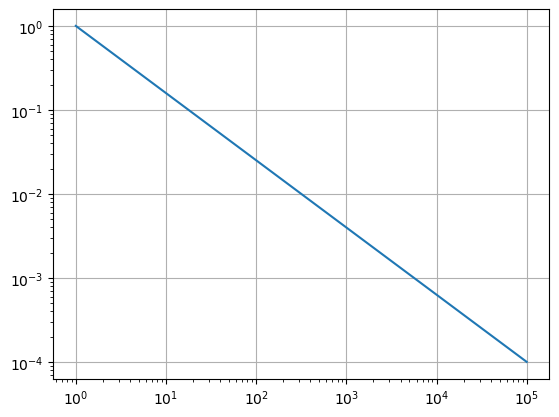

In [8]:
n=np.int_(np.logspace(0,5))
xn=1/n**q
plt.loglog(n,xn)
plt.grid()

Cette droite nous indique que la convergence est une puissance de $n$ : on a $\log x_n = -a \log n + b$ donc $x_n=e^{b}\frac1{n^a}$. Pour trouver le $a$ il suffit de trouver la « pente » en échelle logarithmique : on passe de $10^0$ à $10^5$ en $n$, et de $10^0$ à $10^{-4}$ en $x_n$. La pente est de $\frac{-4-0}{5-0}=0.8$.

## Tracer des jolis graphes de fonctions 
* Fonctions de matplotlib à retenir : `plot` (avec option `label`), `title`, `legend`, `xlabel`, `ylabel`, `grid`
* Fonctions de numpy à retenir : `linspace`

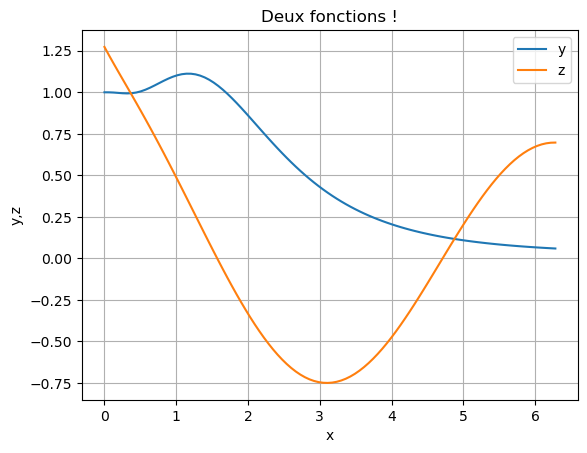

In [9]:
x=np.linspace(0,2*np.pi,100)
y=np.exp(-x**2/10*np.sin(10*x/(1+x)))
z=np.cos(x)/np.arctan(x+1)
plt.title('Deux fonctions !')
plt.plot(x,y,label="y")
plt.plot(x,z,label="z")
plt.xlabel('x')
plt.ylabel('y,z')
plt.legend()
plt.grid()

## Boucles
Pour ne pas se prendre la tête, éviter les boucles `while` si on sait déjà qu’on va arrêter la boucle au bout d’un nombre fixé d’itérations, faire une boucle `for` à la place avec condition de sortie !

## Indexation des tableaux de numpy, sommes.

Utile pour le calcul des formules de quadratures par exemple.
Fonctions à retenir : `sum`, opérations usuelles.

On peut agir sur des sous-tableaux en utilisant `a[debut:fin:pas]` (attention, rappelez vous que la fin est exclue, et chacun de ces paramètres est optionnel).

In [10]:
a=np.arange(-5,5)
a[2:8:2]=0
a,a[8],a[5:],a[:5],a[::3]

(array([-5, -4,  0, -2,  0,  0,  0,  2,  3,  4]),
 np.int64(3),
 array([0, 0, 2, 3, 4]),
 array([-5, -4,  0, -2,  0]),
 array([-5, -2,  0,  4]))

On peut utiliser des indices négatifs pour partir de la fin.

In [11]:
a[-1],a[-5:-2]

(np.int64(4), array([0, 0, 2]))

On peut mélanger les opérations sur les tableaux avec des opérations sur les nombres (l’opération est faite sur tous les éléments du tableau).

In [12]:
a+3,5*a+np.sum(a)

(array([-2, -1,  3,  1,  3,  3,  3,  5,  6,  7]),
 array([-27, -22,  -2, -12,  -2,  -2,  -2,   8,  13,  18]))

## Fonctions, compréhensions de listes.
Dans numpy, les fonctions de la bibliothèque sont déjà implémentées pour fonctionner sur des tableaux éléments par élement. Par contre pour les fonctions définies par `def`, cela ne marche pas forcément. On peut utiliser les listes (avec compréhension, ne pas oublier de les retransformer en array de numpy si ensuite on veut les utiliser comme ça), ou la fonction `vectorize` (pour transformer une fonction en une fonction qui peut s’appliquer élément par élément sur les tableaux).

In [13]:
def maxzero(x):
    if x>0.:
        return x
    else:
        return 0.

# maxzero(np.arange(-2,2)) # retourne une erreur
vec_maxzero = np.vectorize(maxzero) 
# Attention quand même au type renvoyé, si on avait mis return 0 (sans le point) à la fin de la fonction, ça renverrait tout le temps des entiers…
vec_maxzero(np.arange(-2.,3.,.5))

array([0. , 0. , 0. , 0. , 0. , 0.5, 1. , 1.5, 2. , 2.5])

In [14]:
np.array([maxzero(x) for x in np.arange(-2,3,.5)])

array([0. , 0. , 0. , 0. , 0. , 0.5, 1. , 1.5, 2. , 2.5])